In [0]:
import tensorflow as tf
import mlflow
import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
print('Tamanho de X_train: ', x_train.shape)
print('Tamanho de X_test: ', x_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (60000, 28, 28)
Tamanho de X_test:  (10000, 28, 28)
Tamanho de y_train:  (60000,)
Tamanho de y_test:  (10000,)


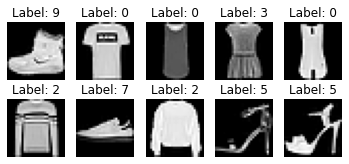

In [0]:
# Exibir as primeiras 10 imagens
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title('Label: {}'.format(y_train[i]))
    plt.axis('off')

plt.show()

In [0]:
# Normalizar os dados
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar os dados
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Converter os rótulos em vetores de categorias
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [0]:
def create_model(n_classes, train_shape):
    model = models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='CategoricalCrossentropy',
              metrics=['accuracy'])
    
    model.summary()
    return model

In [0]:
input_shape = (28, 28, 1)
n_classes= 10

model = create_model(n_classes, input_shape)    

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                346176    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                      

In [0]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
 404/1875 [=====>........................] - ETA: 29s - loss: 0.6630 - accuracy: 0.7624

*** WARNING: max output size exceeded, skipping output. ***

1875/1875 [==============================] - 36s 19ms/step - loss: 0.1041 - accuracy: 0.9617 - val_loss: 0.2997 - val_accuracy: 0.9063


In [0]:
loss, accuracy = model.evaluate(x_test, y_test) 
print('Test loss:', loss) 
print('Test accuracy:', accuracy) 

313/313 [==============================] - 2s 6ms/step - loss: 0.3054 - accuracy: 0.9097
Test loss: 0.30536380410194397
Test accuracy: 0.9096999764442444


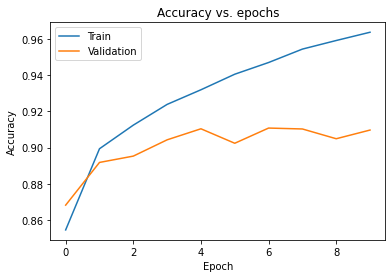

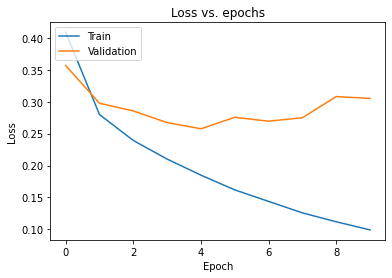

In [0]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()